# This file demonstrates the forward planning of the sales at Walmart in US

In [1]:
import pandas

In [2]:
dataset = pandas.read_csv('Walmart_Sales.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
sales_data = dataset.drop(['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],axis=1)

In [6]:
sales_data.head(10)

,Store,Date,Weekly_Sales
0,1,05-02-2010,1643690.90
1,1,12-02-2010,1641957.44
2,1,19-02-2010,1611968.17
3,1,26-02-2010,1409727.59
4,1,05-03-2010,1554806.68
5,1,12-03-2010,1439541.59
6,1,19-03-2010,1472515.79
7,1,26-03-2010,1404429.92
8,1,02-04-2010,1594968.28
9,1,09-04-2010,1545418.53


In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 150.9+ KB


In [8]:
sales_data['Date'] = pandas.to_datetime(sales_data['Date'], format='%d-%m-%Y')

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 150.9 KB


In [10]:
grouped_sales_data = sales_data.groupby(['Date']).sum()
grouped_sales_data = grouped_sales_data.drop(['Store'], axis=1)

In [11]:
grouped_sales_data

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


# Using seaborn for visualization

In [12]:
import seaborn as sns


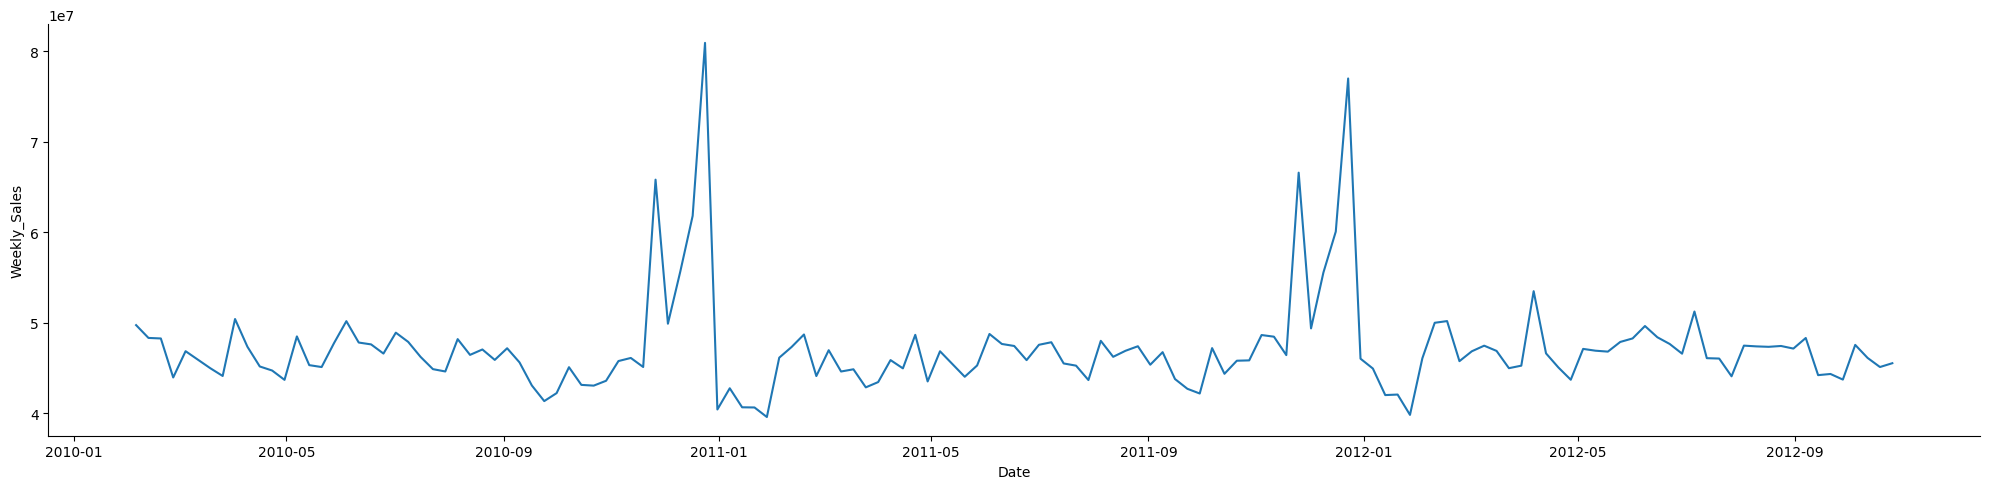

In [13]:
sns.relplot(
    data = grouped_sales_data,
    x = grouped_sales_data.index,
    y = grouped_sales_data.Weekly_Sales,
    kind = 'line',
    height = 5,
    aspect = 4
)

# Observing the seaonality in sales

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_data = seasonal_decompose(
    grouped_sales_data, 
    model="additive",
    period=(52)
)


### Below is the seasonal component and the trend component of the sales

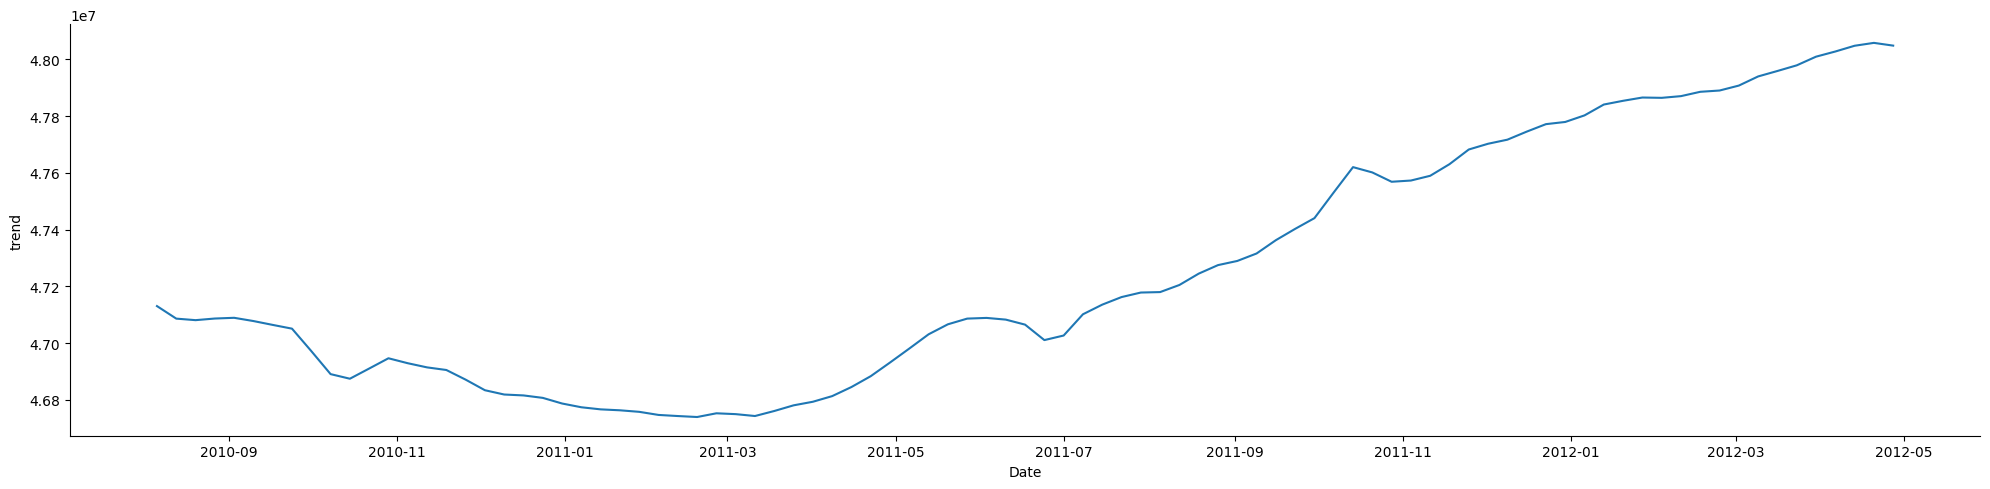

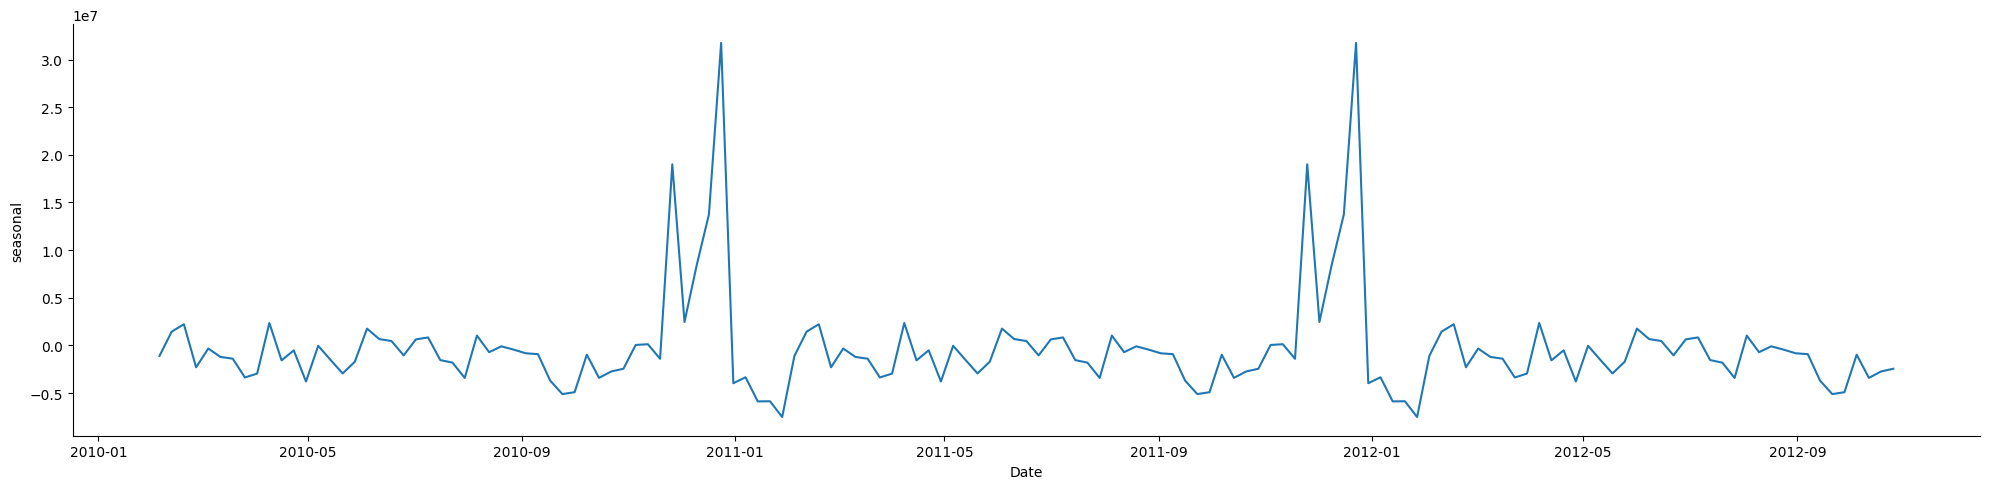

In [15]:
sns.relplot(
    data = decompose_data.trend,
    x = decompose_data.trend.index,
    y = decompose_data.trend,
    kind = 'line',
    height = 5,
    aspect = 4
)
sns.relplot(
    data = decompose_data.seasonal,
    x = decompose_data.seasonal.index,
    y = decompose_data.seasonal,
    kind = 'line',
    height = 5,
    aspect = 4
)

# Performing statistical tests - adf test

In [16]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical values', 'icbest']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

        


### P-value after the ADF test comes out to be 2.67 which proves that the curve is non stationary

In [19]:
adfuller_test(grouped_sales_data.Weekly_Sales)

ADF Test Statistic : -5.90829795718633
p-value : 2.6759791589860825e-07
#Lags Used : 4
Number of Observations : 138
Critical values : {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}
icbest : 4314.46014989216


# Adding a moving average (length=5) to our sales chart

In [20]:

grouped_sales_data['SMA_5'] = grouped_sales_data['Weekly_Sales'].rolling(5).mean()

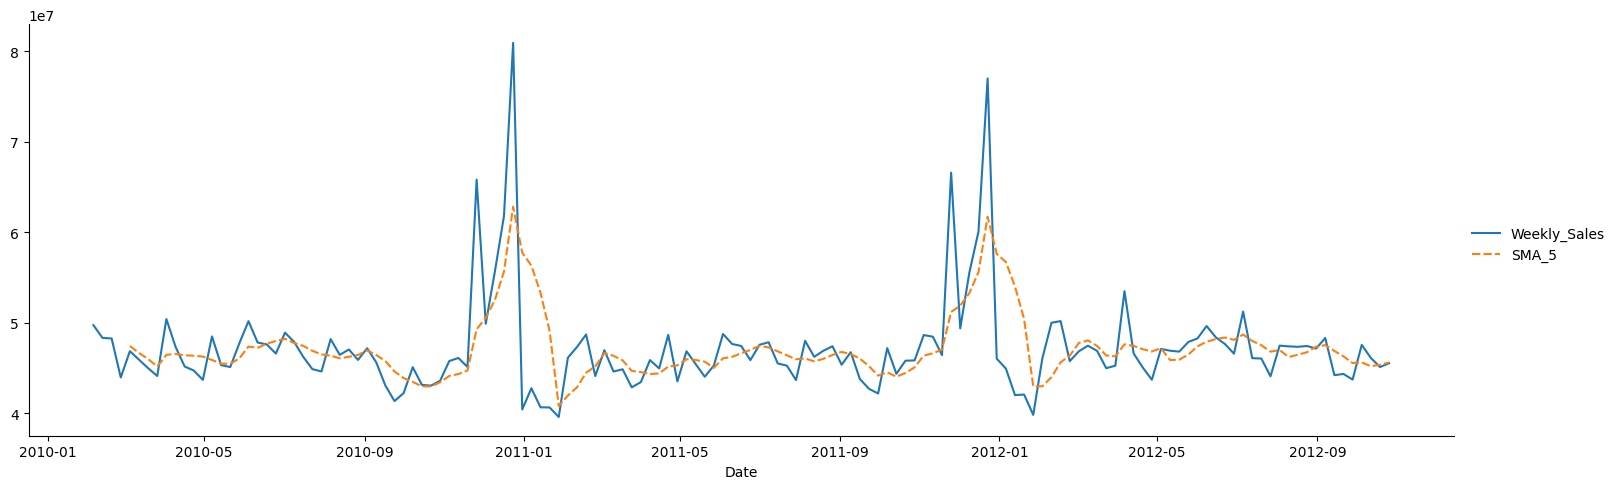

In [23]:
sns.relplot(grouped_sales_data,
           height=5,
           aspect=3,
           kind='line')

# Observing the Auto correlation

In [24]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

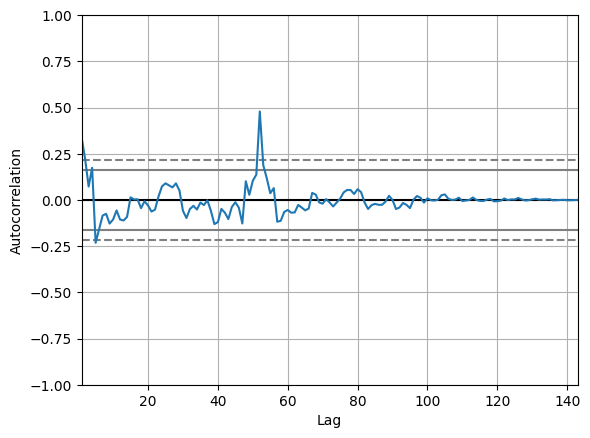

In [25]:
autocorrelation_plot(grouped_sales_data.Weekly_Sales)

# Using Sarimax for forecasting

### As the data recorded is weekly, seasonality component to be 52 

In [26]:
import statsmodels.api as SM
#import tsa.statespace as S
model = SM.tsa.statespace.SARIMAX(grouped_sales_data.Weekly_Sales,order=(1,1,1), seasonal_order=(1,1,1,52))
result = model.fit()
result.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20640D+01    |proj g|=  6.61584D+00

At iterate    5    f=  1.00664D+01    |proj g|=  7.91329D-02

At iterate   10    f=  1.00347D+01    |proj g|=  9.24200D-02

At iterate   15    f=  1.00199D+01    |proj g|=  6.11745D-02

At iterate   20    f=  1.00186D+01    |proj g|=  4.13265D-03

At iterate   25    f=  1.00184D+01    |proj g|=  1.37059D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1432.630
Date:                            Sat, 13 Jul 2024   AIC                           2875.260
Time:                                    22:18:31   BIC                           2887.759
Sample:                                02-05-2010   HQIC                          2880.300
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1577      0.637      0.248      0.804      -1.090       1.406
ma.L1         -0.3066      0.629     -0.487      0.626      -1.539       0.926
ar.S.L52       0.6352      0.150      4.237      0.000       0.341       0.929
ma.S.L52      -0.8843      0.261     -3.388      0.001      -1.396      -0.373
sigma2      4.007e+12   1.43e-13    2.8e+25      0.000    4.01e+12    4.01e+12
===================================================================================
Ljung-Box (L1) (Q):                  10.13   Jarque-Bera (JB):                 4.88
Prob(Q):                              0.00   Prob(JB):                         0.09
Heteroskedasticity (H):               1.38   Skew:                             0.12
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.41e+41. Standard errors may be unstable.
"""

### The forecast for the current data is plotted with a green line on the chart

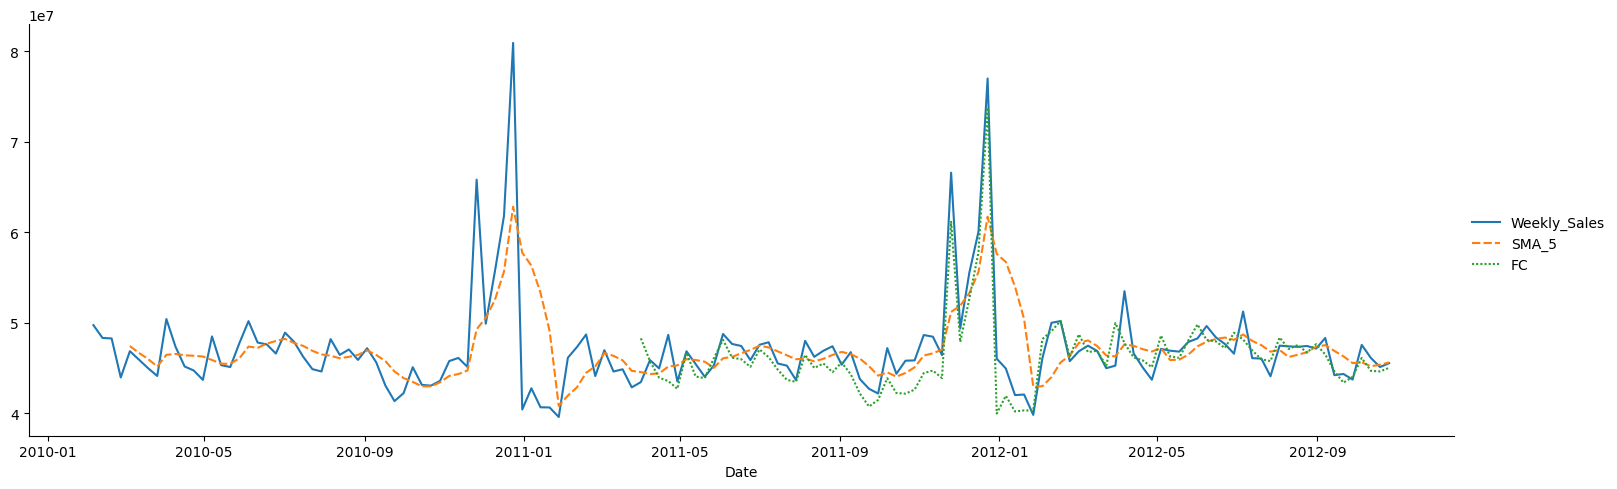

In [28]:

grouped_sales_data['FC']=result.predict(start=60,dynamic=True)
sns.relplot(grouped_sales_data,
            kind='line',
            height = 5,
            aspect = 3
           )
#grouped_sales_data[['Weekly_Sales','FC']].plot(figsize=(12,8))


In [29]:
grouped_sales_data

,Weekly_Sales,SMA_5,FC
Date,,,
2010-02-05,49750740.50,NaN,NaN
2010-02-12,48336677.63,NaN,NaN
2010-02-19,48276993.78,NaN,NaN
2010-02-26,43968571.13,NaN,NaN
2010-03-05,46871470.30,4.744089e+07,NaN
...,...,...,...
2012-09-28,43734899.40,4.556104e+07,4.403664e+07
2012-10-05,47566639.31,4.564244e+07,4.612368e+07
2012-10-12,46128514.25,4.520213e+07,4.469968e+07


# Working on creating dated datased for ahead

In [30]:
d = pandas.tseries.offsets 
pred_date = [grouped_sales_data.index[-1] + d.DateOffset(weeks=x) for x in range (0,104)]

In [32]:
pred_date = pandas.DataFrame(index=pred_date[1:], columns=grouped_sales_data.columns)

### the dataset is ready to be merged with the existing dataset

In [33]:
pred_date.head()

,Weekly_Sales,SMA_5,FC
2012-11-02,NaN,NaN,NaN
2012-11-09,NaN,NaN,NaN
2012-11-16,NaN,NaN,NaN
2012-11-23,NaN,NaN,NaN
2012-11-30,NaN,NaN,NaN


In [34]:
future_sales_data = pandas.concat([grouped_sales_data,pred_date])

In [35]:
future_sales_data

,Weekly_Sales,SMA_5,FC
2010-02-05,49750740.50,NaN,NaN
2010-02-12,48336677.63,NaN,NaN
2010-02-19,48276993.78,NaN,NaN
2010-02-26,43968571.13,NaN,NaN
2010-03-05,46871470.30,4.744089e+07,NaN
...,...,...,...
2014-09-19,NaN,NaN,NaN
2014-09-26,NaN,NaN,NaN
2014-10-03,NaN,NaN,NaN
2014-10-10,NaN,NaN,NaN


### plotting the prediction values (represented in green) directly on the graph 

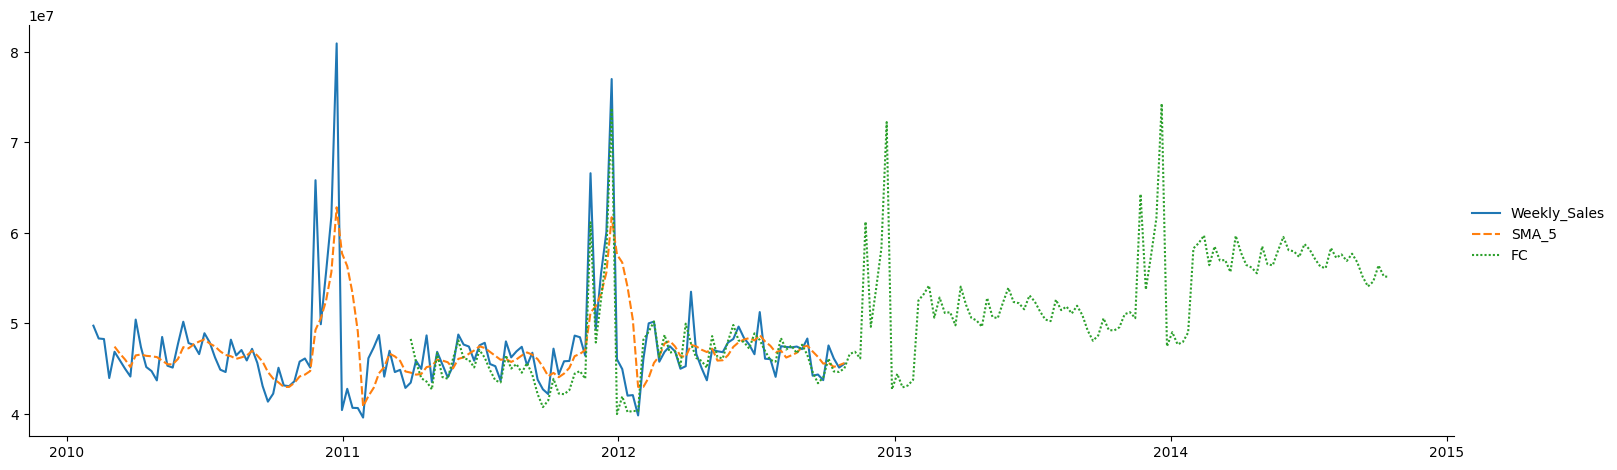

In [37]:
future_sales_data['FC']=result.predict(start=60,end=250,dynamic=True)
sns.relplot(future_sales_data,
            kind='line',
            height = 5,
            aspect = 3
           )